### DRILL: Mo' blobs, mo' problems?

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. Lets generate 10000 samples with two features and create blobs of 5 centers 

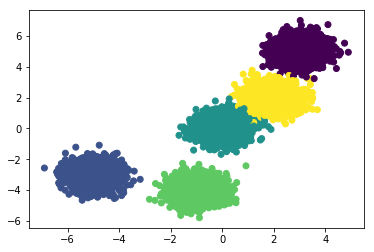

In [9]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[3,5], [-5, -3], [0, 0], [-1,-4], [2,2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.5.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=0.5,
    n_features=2,
    random_state=48)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=48)

**A. K-means** 

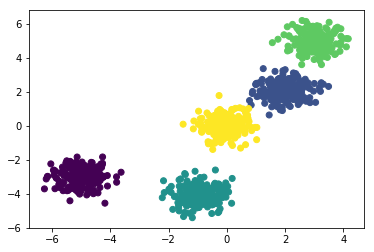

Comparing k-means clusters against the data:
col_0    0    1    2    3    4
row_0                         
0        0  189    0    0    0
1        0    0    1    0  197
2        0    0    0  222    0
3      189    0    0    0    0
4        0    0  202    0    0


In [10]:
from sklearn.cluster import KMeans

# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=48).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

**B. Mean_shift**

In [11]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 4


I run both algorisms using different standard deviation.for K-means algorism since we chose random number of clusters to begin with, we can not tell if the number of clusters that we have selected is bad or not.Incase of the mean shift algorism however, we can see that with different clusters' standard deviation the estimated number of clusters are different.our blob function generated 5 clusters but the estimated clusters with our mean shift algorism was 4 when cluster STD was 0.5.But when the Cluster STD was 1.5, the estimated number of clusters was only 2.

lets now see the performance of the Mean_shift algorism.

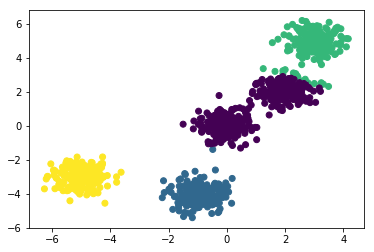

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    0  189    0
1        0    0    0  189
2      202    1    0    0
3        0  222    0    0
4      180    0   17    0


In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

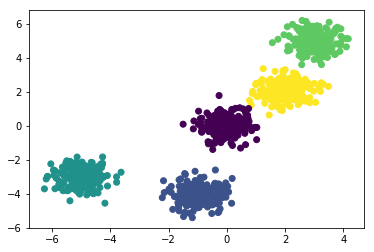

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0    0  189    0
1        0    0  189    0    0
2      202    0    0    0    1
3        0  222    0    0    0
4        0    0    0    0  197


In [15]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [16]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 199


Too large number of clusters, an indication that it is not a good algorism in this particular case.

Lets try this time a fewer number of clusters.From my intitial investigation i learned that when the Cluster's standard deviation was set to 1.5, the number of estimated clusters in case of Mean shift algorism was only 2.Therefore i desided to assign a number of clusters as 2 wwith standard deviation of 1.5 in case of other algorisms too.

2. Lets generate 10000 samples with two features and create blobs of 2 centers.

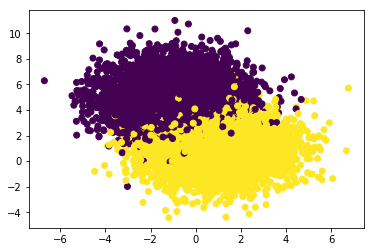

In [17]:
centers = [[-1,5], [1, 1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.5.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1.5,
    n_features=2,
    random_state=48)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=48)

**A. K-Means**

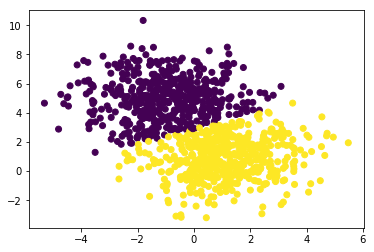

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      458   45
1       28  469


In [18]:
from sklearn.cluster import KMeans

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=48).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

**B. Mean_shift**

In [19]:
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


Yap!

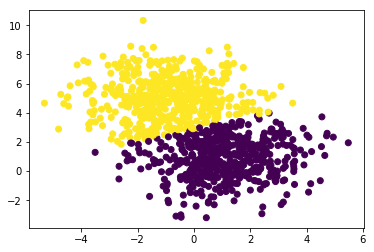

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0       29  457
1      469   45


In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Both the K-Means and Mean_shift performed the same.But the precision was lesser because the blobs generated were quite overlapping when compared with the five blobs we have used in case 1.

**Spectral Clustering**

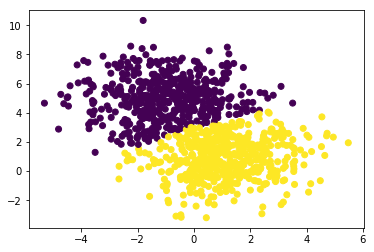

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      457   29
1       43  471


In [21]:
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

This algorisms performed the same with the previous two clustering Algorisms.

In [23]:
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 67


This algorism is still estimating a high number of clusters which makes it inappropriate clustering algorism choice in this case.